# Análisis del Comportamiento de Clientes en un Espacio de Trabajo y Estudio

In [2]:
import pandas as pd
from datetime import datetime
import seaborn as sns

In [3]:
df_consumos = pd.read_csv('data/consumos.csv')
df_tickets = pd.read_csv('data/tickets.csv')

In [4]:
df_consumos

,ticket_id,producto,precio
0,1,Té verde,2.8
1,1,Capuchino,3.2
2,1,Croissant,2.2
3,2,Sándwich,4.5
4,2,Café con leche,3.0
...,...,...,...
5310,2677,Tarta de queso,3.5
5311,2678,Café con leche,3.0
5312,2678,Sándwich,4.5
5313,2679,Ensalada,5.0


In [5]:
df_tickets

,ticket_id,fecha,hora_llegada,hora_salida,duracion_min,tipo_visita,proposito,dispositivos_conectados,clima,total_usd
0,1,2025-04-15,13:36,15:18,103,individual,estudio,1,nublado,8.2
1,2,2025-04-15,08:09,10:04,115,individual,trabajo,1,nublado,7.5
2,3,2025-04-15,17:42,18:54,72,individual,estudio,2,nublado,10.3
3,4,2025-04-15,16:11,17:33,81,individual,estudio,2,nublado,2.8
4,5,2025-04-15,17:59,19:18,78,pareja,trabajo,2,nublado,6.3
...,...,...,...,...,...,...,...,...,...,...
2674,2675,2025-05-14,11:27,13:02,95,pareja,estudio,5,nublado,11.2
2675,2676,2025-05-14,11:39,12:32,53,individual,estudio,1,nublado,2.8
2676,2677,2025-05-14,10:37,12:28,111,grupo,estudio,2,nublado,3.5
2677,2678,2025-05-14,10:36,11:28,52,individual,estudio,2,nublado,7.5


## 1. Preprocesamiento de los datos

In [6]:
df_tickets.describe()

,ticket_id,duracion_min,dispositivos_conectados,total_usd
count,2679.00000,2679.000000,2679.000000,2679.000000
mean,1340.00000,89.661814,2.080254,6.743412
std,773.50501,30.048949,1.217520,2.947882
min,1.00000,15.000000,1.000000,2.200000
25%,670.50000,69.000000,1.000000,4.000000
50%,1340.00000,90.000000,2.000000,6.700000
75%,2009.50000,110.500000,2.000000,9.200000
max,2679.00000,192.000000,5.000000,13.500000


In [7]:
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679 entries, 0 to 2678
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticket_id                2679 non-null   int64  
 1   fecha                    2679 non-null   object 
 2   hora_llegada             2679 non-null   object 
 3   hora_salida              2679 non-null   object 
 4   duracion_min             2679 non-null   int64  
 5   tipo_visita              2679 non-null   object 
 6   proposito                2679 non-null   object 
 7   dispositivos_conectados  2679 non-null   int64  
 8   clima                    2679 non-null   object 
 9   total_usd                2679 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 209.4+ KB


In [8]:
def datetim(data):
    return datetime.strptime(data, '%H:%M').time()

df_tickets['hora_salida'] = df_tickets['hora_salida'].apply(datetim)
df_tickets['hora_llegada'] = df_tickets['hora_llegada'].apply(datetim)

In [9]:
df_tickets['fecha'] = pd.to_datetime(df_tickets['fecha'], format='%Y-%m-%d')
df_tickets['month'] = df_tickets['fecha'].dt.month_name()
df_tickets

,ticket_id,fecha,hora_llegada,hora_salida,duracion_min,tipo_visita,proposito,dispositivos_conectados,clima,total_usd,month
0,1,2025-04-15,13:36:00,15:18:00,103,individual,estudio,1,nublado,8.2,April
1,2,2025-04-15,08:09:00,10:04:00,115,individual,trabajo,1,nublado,7.5,April
2,3,2025-04-15,17:42:00,18:54:00,72,individual,estudio,2,nublado,10.3,April
3,4,2025-04-15,16:11:00,17:33:00,81,individual,estudio,2,nublado,2.8,April
4,5,2025-04-15,17:59:00,19:18:00,78,pareja,trabajo,2,nublado,6.3,April
...,...,...,...,...,...,...,...,...,...,...,...
2674,2675,2025-05-14,11:27:00,13:02:00,95,pareja,estudio,5,nublado,11.2,May
2675,2676,2025-05-14,11:39:00,12:32:00,53,individual,estudio,1,nublado,2.8,May
2676,2677,2025-05-14,10:37:00,12:28:00,111,grupo,estudio,2,nublado,3.5,May
2677,2678,2025-05-14,10:36:00,11:28:00,52,individual,estudio,2,nublado,7.5,May


In [10]:
df_tickets['hour_arrive'] = df_tickets['hora_llegada'].apply(lambda x: x.hour)
df_tickets['hour_leave'] = df_tickets['hora_salida'].apply(lambda x: x.hour)

In [11]:
df_tickets = df_tickets[['ticket_id', 'fecha', 'month','hora_llegada', 'hora_salida','hour_arrive', 'hour_leave', 'duracion_min', 'tipo_visita', 'proposito', 'dispositivos_conectados', 'clima', 'total_usd']]

In [12]:
df_tickets

,ticket_id,fecha,month,hora_llegada,hora_salida,hour_arrive,hour_leave,duracion_min,tipo_visita,proposito,dispositivos_conectados,clima,total_usd
0,1,2025-04-15,April,13:36:00,15:18:00,13,15,103,individual,estudio,1,nublado,8.2
1,2,2025-04-15,April,08:09:00,10:04:00,8,10,115,individual,trabajo,1,nublado,7.5
2,3,2025-04-15,April,17:42:00,18:54:00,17,18,72,individual,estudio,2,nublado,10.3
3,4,2025-04-15,April,16:11:00,17:33:00,16,17,81,individual,estudio,2,nublado,2.8
4,5,2025-04-15,April,17:59:00,19:18:00,17,19,78,pareja,trabajo,2,nublado,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,2675,2025-05-14,May,11:27:00,13:02:00,11,13,95,pareja,estudio,5,nublado,11.2
2675,2676,2025-05-14,May,11:39:00,12:32:00,11,12,53,individual,estudio,1,nublado,2.8
2676,2677,2025-05-14,May,10:37:00,12:28:00,10,12,111,grupo,estudio,2,nublado,3.5
2677,2678,2025-05-14,May,10:36:00,11:28:00,10,11,52,individual,estudio,2,nublado,7.5


## Análisis Exploratorio de Datos (EDA)

### ¿En qué horarios hay mayor afluencia de personas trabajando o estudiando?

In [13]:
# Horario de un día por cada tipo de visita
df_tickets.groupby(['tipo_visita', 'hour_arrive']).size().unstack()

hour_arrive,8,9,10,11,12,13,14,15,16,17,18,19
tipo_visita,,,,,,,,,,,,
grupo,30,22,27,28,30,48,38,22,37,35,30,38
individual,170,138,118,150,136,138,124,137,131,133,134,117
pareja,63,53,46,50,50,52,69,59,58,58,53,57


In [14]:
df_tickets['day_week'] = df_tickets['fecha'].dt.day_name()

/var/folders/1w/_fkk8d6978j_747fm_9qxcww0000gn/T/ipykernel_1124/2011980432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tickets['day_week'] = df_tickets['fecha'].dt.day_name()


### Ver de manera gráfica, los horarios de ocupación

In [15]:
# Mostrando horarios de ocupación de acuerdo a su tipo de visita y propósito
def schedule_type(visit_type : str = None, purpose : str = None):
    """
    Esta función ayudará a crear mapas de calor de acuerdo a dos columnas categoricas, creará mapas de calor para ver el horario y ver en que hora se ocupan más,
    y en que otras horas se ocupan menos
    """

    if purpose is None and visit_type is None:
        df_data = df_tickets.copy()

    elif purpose is None:
        df_data = df_tickets[df_tickets['tipo_visita'] == visit_type]

    elif visit_type is None:
        df_data = df_tickets[df_tickets['proposito'] == purpose]

    else:
        df_data = df_tickets[(df_tickets['tipo_visita'] == visit_type) & (df_tickets['proposito'] == purpose)]

    df_group = df_data.groupby(['day_week', 'hour_arrive']).size().unstack(fill_value=0)
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_group = df_group.reindex(days_order)

    print(sns.heatmap(data=df_group, annot=True, cmap='crest'))

Axes(0.125,0.11;0.62x0.77)


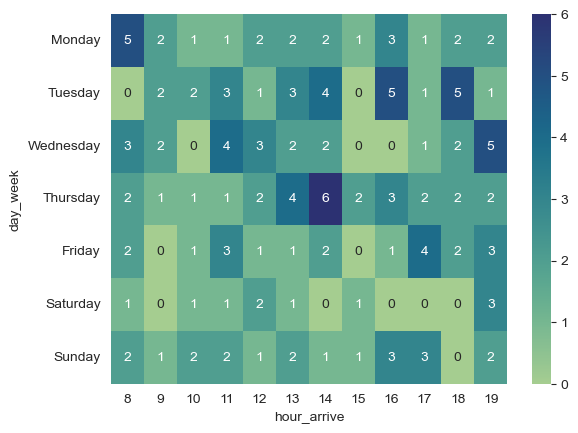

In [16]:
schedule_type('grupo', 'trabajo')

Axes(0.125,0.11;0.62x0.77)


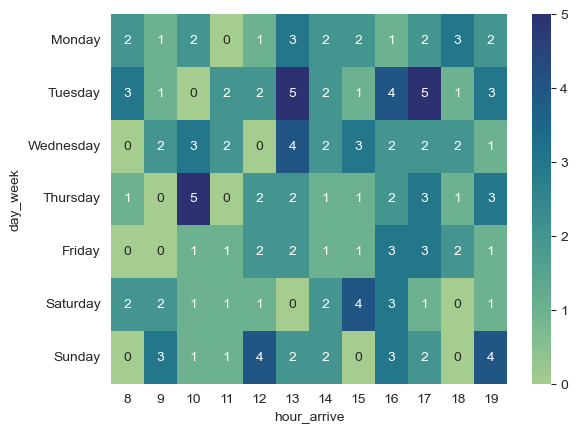

In [17]:
schedule_type('grupo', 'estudio')

Axes(0.125,0.11;0.62x0.77)


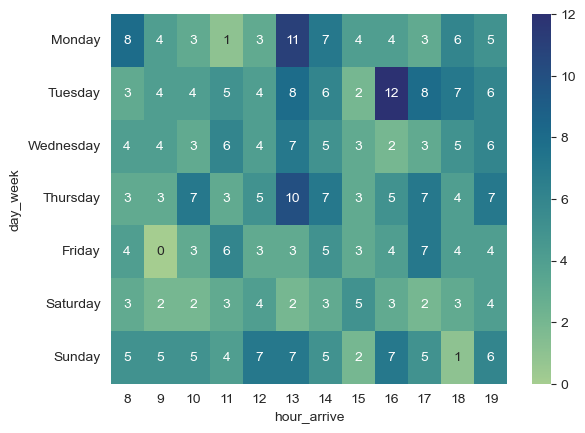

In [18]:
# Vista general del horario de ocupación del tipo de visita 'grupo'
schedule_type('grupo')

Axes(0.125,0.11;0.62x0.77)


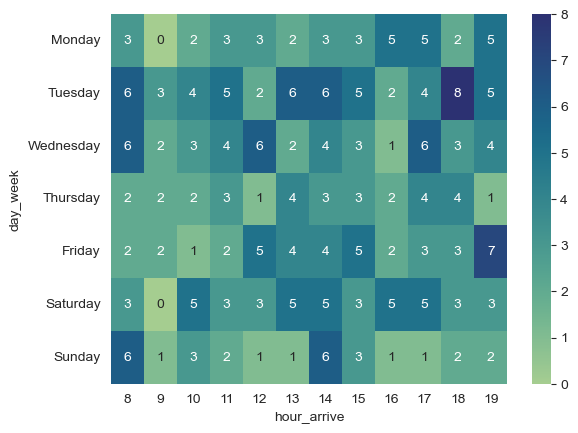

In [19]:
# Ver ahora las diferentes ocupaciones dentro de las parejas
schedule_type('pareja', 'trabajo')

Axes(0.125,0.11;0.62x0.77)


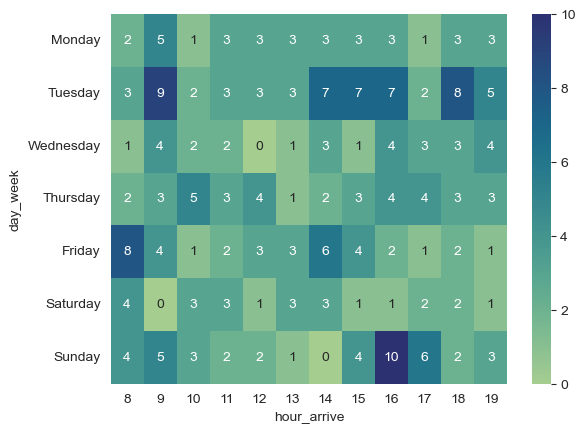

In [20]:
schedule_type('pareja', 'estudio')

Axes(0.125,0.11;0.62x0.77)


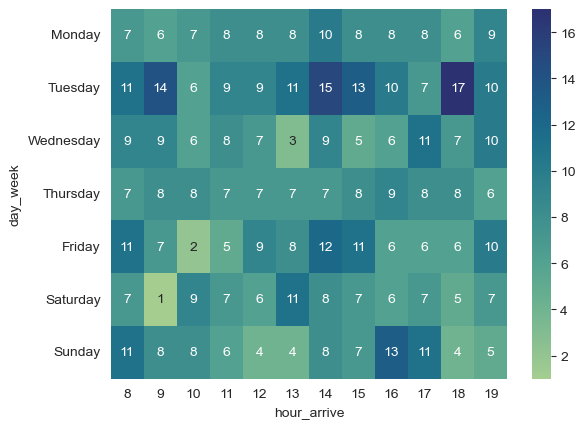

In [21]:
schedule_type('pareja')

Axes(0.125,0.11;0.62x0.77)


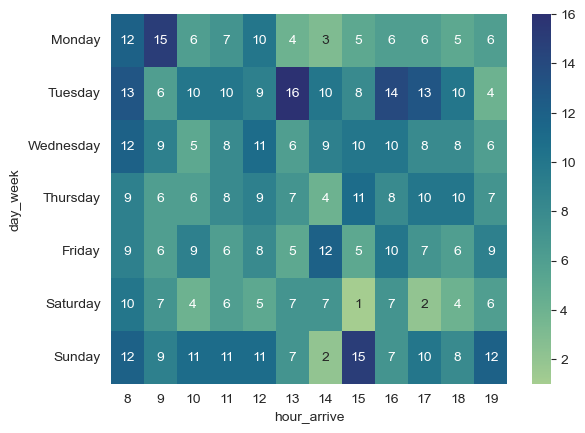

In [22]:
# Ahora ver los horarios de las personas que vienen de forma individual
schedule_type('individual', 'trabajo')

Axes(0.125,0.11;0.62x0.77)


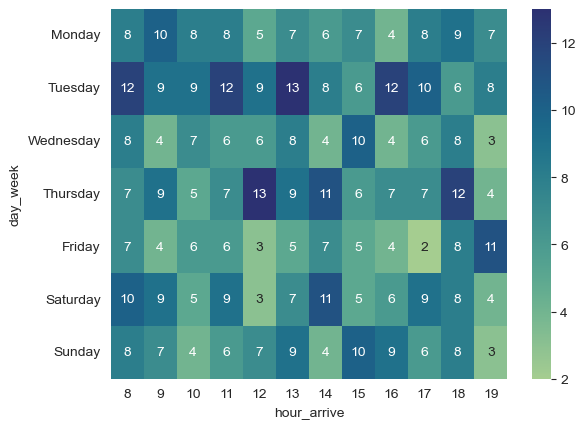

In [23]:
schedule_type('individual', 'estudio')

Axes(0.125,0.11;0.62x0.77)


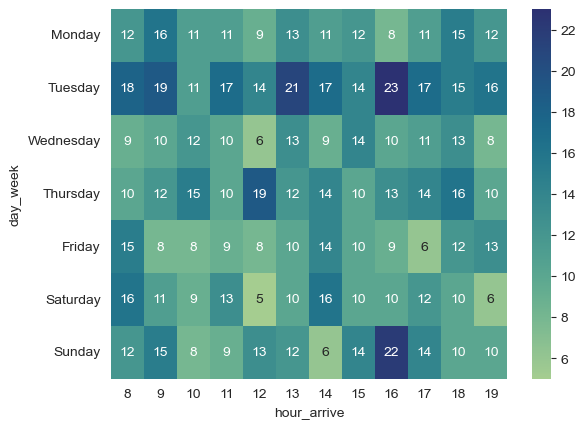

In [24]:
# Ver los grados de ocupacion de acuerdo a proposito
schedule_type(purpose='estudio')

Axes(0.125,0.11;0.62x0.77)


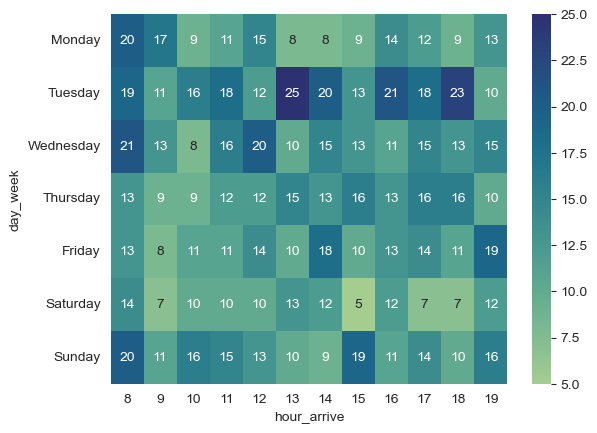

In [25]:
schedule_type(purpose='trabajo')

Axes(0.125,0.11;0.62x0.77)


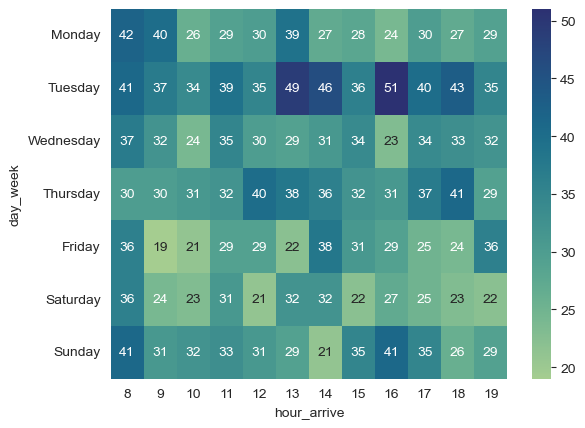

In [26]:
# Ver una vista general del horario de ocupación
schedule_type()

## ¿Qué productos se consumen más durante sesiones de estudio/trabajo?

In [27]:
%%sql
SELECT
    *
FROM
    df_tickets
LEFT JOIN df_consumos ON df_tickets.ticket_id = df_consumos.ticket_id;

,ticket_id,fecha,month,hora_llegada,hora_salida,hour_arrive,hour_leave,duracion_min,tipo_visita,proposito,dispositivos_conectados,clima,total_usd,day_week,ticket_id_1,producto,precio
0,1,2025-04-15,April,13:36:00,15:18:00,13,15,103,individual,estudio,1,nublado,8.2,Tuesday,1,Croissant,2.2
1,2,2025-04-15,April,08:09:00,10:04:00,8,10,115,individual,trabajo,1,nublado,7.5,Tuesday,2,Café con leche,3.0
2,3,2025-04-15,April,17:42:00,18:54:00,17,18,72,individual,estudio,2,nublado,10.3,Tuesday,3,Sándwich,4.5
3,4,2025-04-15,April,16:11:00,17:33:00,16,17,81,individual,estudio,2,nublado,2.8,Tuesday,4,Té verde,2.8
4,5,2025-04-15,April,17:59:00,19:18:00,17,19,78,pareja,trabajo,2,nublado,6.3,Tuesday,5,Té verde,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,2654,2025-05-14,May,11:16:00,13:48:00,11,13,152,individual,estudio,2,nublado,9.7,Wednesday,2654,Capuchino,3.2
5311,2660,2025-05-14,May,11:04:00,12:20:00,11,12,76,individual,trabajo,1,nublado,10.3,Wednesday,2660,Café americano,2.5
5312,2666,2025-05-14,May,12:29:00,14:48:00,12,14,140,individual,estudio,2,nublado,8.5,Wednesday,2666,Té verde,2.8
5313,2672,2025-05-14,May,10:34:00,11:59:00,10,11,85,individual,trabajo,1,nublado,8.5,Wednesday,2672,Té verde,2.8


In [28]:
# Creamos una función para ver los productos que más se consumen por proposito
def most_consumed_products(proposito : str):
    df_productos = df_merge[df_merge['proposito'] == proposito]
    df_productos = df_productos.groupby('producto').agg({'precio' : 'mean', 'producto' : 'count', })
    df_productos = df_productos.assign(total = df_productos['precio'] * df_productos['producto'],
                                       porcentage_produc = round(df_productos['producto'] / df_productos['producto'].sum() * 100, 2))
    df_productos = df_productos.assign(porcentage_total = round(df_productos['total'] / df_productos['total'].sum() * 100, 2))
    df_productos = df_productos.sort_values('total', ascending=False)
    return df_productos

### Ver que productos se consumen más cuando la gente va a estudiar

In [29]:
most_consumed_products('estudio')

,precio,producto,total,porcentage_produc,porcentage_total
producto,,,,,
Ensalada,5.0,233,1165.0,11.61,17.00
Sándwich,4.5,206,927.0,10.26,13.53
Smoothie,4.0,216,864.0,10.76,12.61
Tarta de queso,3.5,232,812.0,11.56,11.85
Café con leche,3.0,267,801.0,13.30,11.69
Capuchino,3.2,225,720.0,11.21,10.51
Té verde,2.8,196,548.8,9.77,8.01
Café americano,2.5,215,537.5,10.71,7.84
Croissant,2.2,217,477.4,10.81,6.97


### Ver que productos se consumen más cuando la gente va a trabajar

In [30]:
most_consumed_products('trabajo')

,precio,producto,total,porcentage_produc,porcentage_total
producto,,,,,
Ensalada,5.0,239,1195.0,10.64,15.71
Sándwich,4.5,236,1062.0,10.50,13.96
Smoothie,4.0,240,960.0,10.68,12.62
Tarta de queso,3.5,254,889.0,11.30,11.69
Café con leche,3.0,269,807.0,11.97,10.61
Capuchino,3.2,240,768.0,10.68,10.10
Té verde,2.8,272,761.6,12.11,10.01
Café americano,2.5,239,597.5,10.64,7.85
Croissant,2.2,258,567.6,11.48,7.46


## Estancia promedio por cada tipo de cliente

In [31]:
# Se crea una función para ver tiempo promedio por tipo de cliente
def avg_time_customer(tipo : str):
    df_customer = df_tickets[df_tickets['tipo_visita'] == tipo]
    return round(df_customer.duracion_min.mean(), 2)

In [32]:
avg_time_customer('individual')

np.float64(89.59)

In [33]:
avg_time_customer('pareja')

np.float64(90.23)

In [34]:
avg_time_customer('grupo')

np.float64(88.98)

## ¿Las ventas cambian si hay eventos como lluvias, exámenes universitarios, etc.?

In [35]:
df_tickets['clima'].unique()

array(['nublado', 'soleado', 'lluvioso'], dtype=object)

In [42]:
# Se crea una función para ver si hay un cambio en las ventas por evento
def sales_per_weather(evento : str):
    df_customer = df_tickets[df_tickets['clima'] == evento]
    return round(df_customer['total_usd'].sum(), 2)

In [43]:
sales_per_weather('nublado')

np.float64(6352.9)

In [44]:
sales_per_weather('soleado')

np.float64(10168.9)

In [45]:
sales_per_weather('lluvioso')

np.float64(1543.8)

## ¿Qué diferencias hay entre clientes individuales y grupos (reuniones)?

In [48]:
df_tickets[df_tickets['tipo_visita'] == 'individual'].describe(include='all')

,ticket_id,fecha,month,hora_llegada,hora_salida,hour_arrive,hour_leave,duracion_min,tipo_visita,proposito,dispositivos_conectados,clima,total_usd,day_week
count,1626.000000,1626,1626,1626,1626,1626.000000,1626.000000,1626.000000,1626,1626,1626.00000,1626,1626.000000,1626
unique,NaN,NaN,2,643,667,NaN,NaN,NaN,1,4,NaN,3,NaN,7
top,NaN,NaN,May,09:30:00,10:22:00,NaN,NaN,NaN,individual,trabajo,NaN,soleado,NaN,Tuesday
freq,NaN,NaN,854,8,8,NaN,NaN,NaN,1626,678,NaN,904,NaN,285
mean,1352.857934,2025-04-30 13:56:54.022140160,NaN,NaN,NaN,13.309348,14.789053,89.587331,NaN,NaN,1.49631,NaN,6.733395,NaN
min,1.000000,2025-04-15 00:00:00,NaN,NaN,NaN,8.000000,8.000000,15.000000,NaN,NaN,1.00000,NaN,2.200000,NaN
25%,688.250000,2025-04-23 00:00:00,NaN,NaN,NaN,10.000000,12.000000,70.000000,NaN,NaN,1.00000,NaN,4.000000,NaN
50%,1354.500000,2025-05-01 00:00:00,NaN,NaN,NaN,13.000000,15.000000,90.000000,NaN,NaN,1.00000,NaN,6.700000,NaN
75%,2029.750000,2025-05-08 00:00:00,NaN,NaN,NaN,16.000000,18.000000,111.000000,NaN,NaN,2.00000,NaN,9.000000,NaN
max,2679.000000,2025-05-14 00:00:00,NaN,NaN,NaN,19.000000,22.000000,176.000000,NaN,NaN,2.00000,NaN,13.500000,NaN


In [50]:
df_tickets[df_tickets['tipo_visita'] == 'grupo'].describe(include='all')

,ticket_id,fecha,month,hora_llegada,hora_salida,hour_arrive,hour_leave,duracion_min,tipo_visita,proposito,dispositivos_conectados,clima,total_usd,day_week
count,385.000000,385,385,385,385,385.000000,385.000000,385.000000,385,385,385.000000,385,385.000000,385
unique,NaN,NaN,2,296,305,NaN,NaN,NaN,1,4,NaN,3,NaN,7
top,NaN,NaN,May,14:58:00,20:48:00,NaN,NaN,NaN,grupo,trabajo,NaN,soleado,NaN,Tuesday
freq,NaN,NaN,206,4,3,NaN,NaN,NaN,385,153,NaN,221,NaN,69
mean,1359.189610,2025-04-30 14:16:31.168831232,NaN,NaN,NaN,13.794805,15.275325,88.984416,NaN,NaN,2.979221,NaN,6.690390,NaN
min,8.000000,2025-04-15 00:00:00,NaN,NaN,NaN,8.000000,9.000000,15.000000,NaN,NaN,1.000000,NaN,2.200000,NaN
25%,667.000000,2025-04-23 00:00:00,NaN,NaN,NaN,11.000000,13.000000,66.000000,NaN,NaN,2.000000,NaN,4.000000,NaN
50%,1362.000000,2025-05-01 00:00:00,NaN,NaN,NaN,14.000000,15.000000,89.000000,NaN,NaN,3.000000,NaN,6.700000,NaN
75%,2066.000000,2025-05-09 00:00:00,NaN,NaN,NaN,17.000000,18.000000,109.000000,NaN,NaN,4.000000,NaN,9.000000,NaN
max,2677.000000,2025-05-14 00:00:00,NaN,NaN,NaN,19.000000,22.000000,185.000000,NaN,NaN,5.000000,NaN,13.000000,NaN


## Correlación entre tipo de consumo (café, té, postres) y duración

In [55]:
df_merge.groupby('producto')['duracion_min'].mean().sort_values(ascending=False).round(2)

producto
Croissant         91.99
Té verde          90.68
Café americano    90.25
Smoothie          90.01
Tarta de queso    89.85
Capuchino         89.35
Sándwich          89.04
Café con leche    88.31
Ensalada          88.10
Name: duracion_min, dtype: float64

## ¿Cuáles son los días más rentables y por qué?

In [56]:
df_merge.groupby('day_week')['total_usd'].sum().sort_values(ascending=False).round(2)

day_week
Tuesday      7478.0
Sunday       6290.7
Thursday     6196.8
Monday       5741.3
Wednesday    5580.0
Saturday     5331.9
Friday       5108.0
Name: total_usd, dtype: float64